## Null Hypothesis

The null hypothesis (H0) is that none of the features have an effect on the likelihood of customers exiting. In other words, variations in the features do not lead to significant changes in customer exit rates.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\tsher\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [6]:
file = 'data/cleaned.csv'

In [37]:
bank_data.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
bank_data = pd.read_csv(file)

In [40]:
bank_data['Female'].head(5)

KeyError: 'Female'

In [41]:
bank_data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,0.612909,0.271971,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,0.160207,0.119827,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,0.494000,0.189189,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,0.618000,0.256757,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,0.720000,0.324324,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,1.000000,1.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [10]:
bank_data.columns

Index(['Unnamed: 0', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

# Exploratory Data Analysis (EDA)

## Customer Distribution by Geography

In our EDA, we focus on understanding the customer base across different regions. We've created a bar plot to visualize the distribution of customers by geography.

### Methodology
To create the visualization, we used the seaborn library's `countplot` function, which is an excellent tool for showing the counts of observations in each categorical bin using bars.

### Observations from the Plot
- The bar plot shows that France has the highest number of customers, followed by Spain and Germany.
- There is a significant difference between the number of customers in France and the other two countries.

### Code Snippet Used for the Plot
Here's the Python code that was used to generate the bar plot:


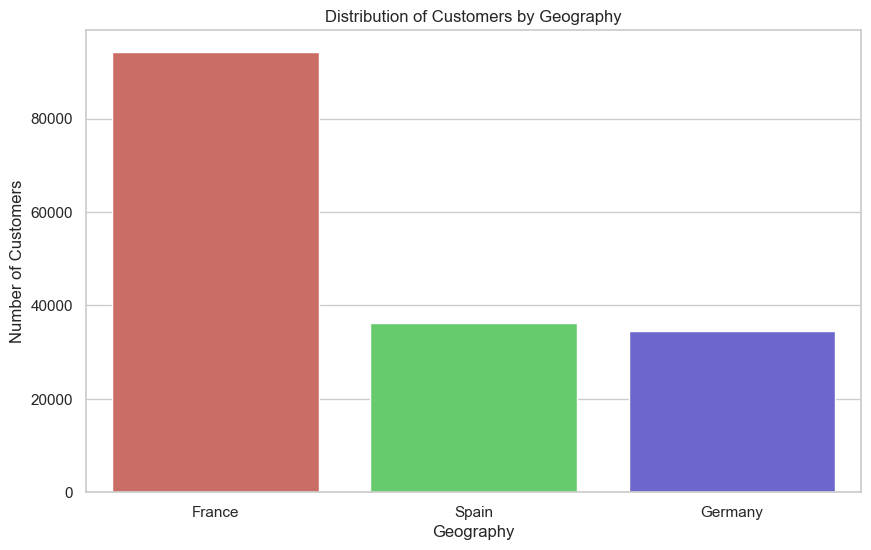

In [11]:
# Set a white grid style
sns.set(style="whitegrid")

# Creating a bar plot for the 'Geography' column
plt.figure(figsize=(10, 6))
sns.countplot(x='Geography', data=bank_data, palette="hls")

plt.title('Distribution of Customers by Geography')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.show()

In [12]:
#Difference between france and germany

In [13]:
# Calculate the number of customers in France and Germany, and Spain
num_customers_france = bank_data[bank_data['Geography'] == 'France'].shape[0]
num_customers_germany = bank_data[bank_data['Geography'] == 'Germany'].shape[0]
num_customers_spain = bank_data[bank_data['Geography'] == 'Spain'].shape[0]
print(f'Number from France: {num_customers_france}, Spain: {num_customers_spain} ,Germany:  {num_customers_germany} ')

Number from France: 94215, Spain: 36213 ,Germany:  34606 


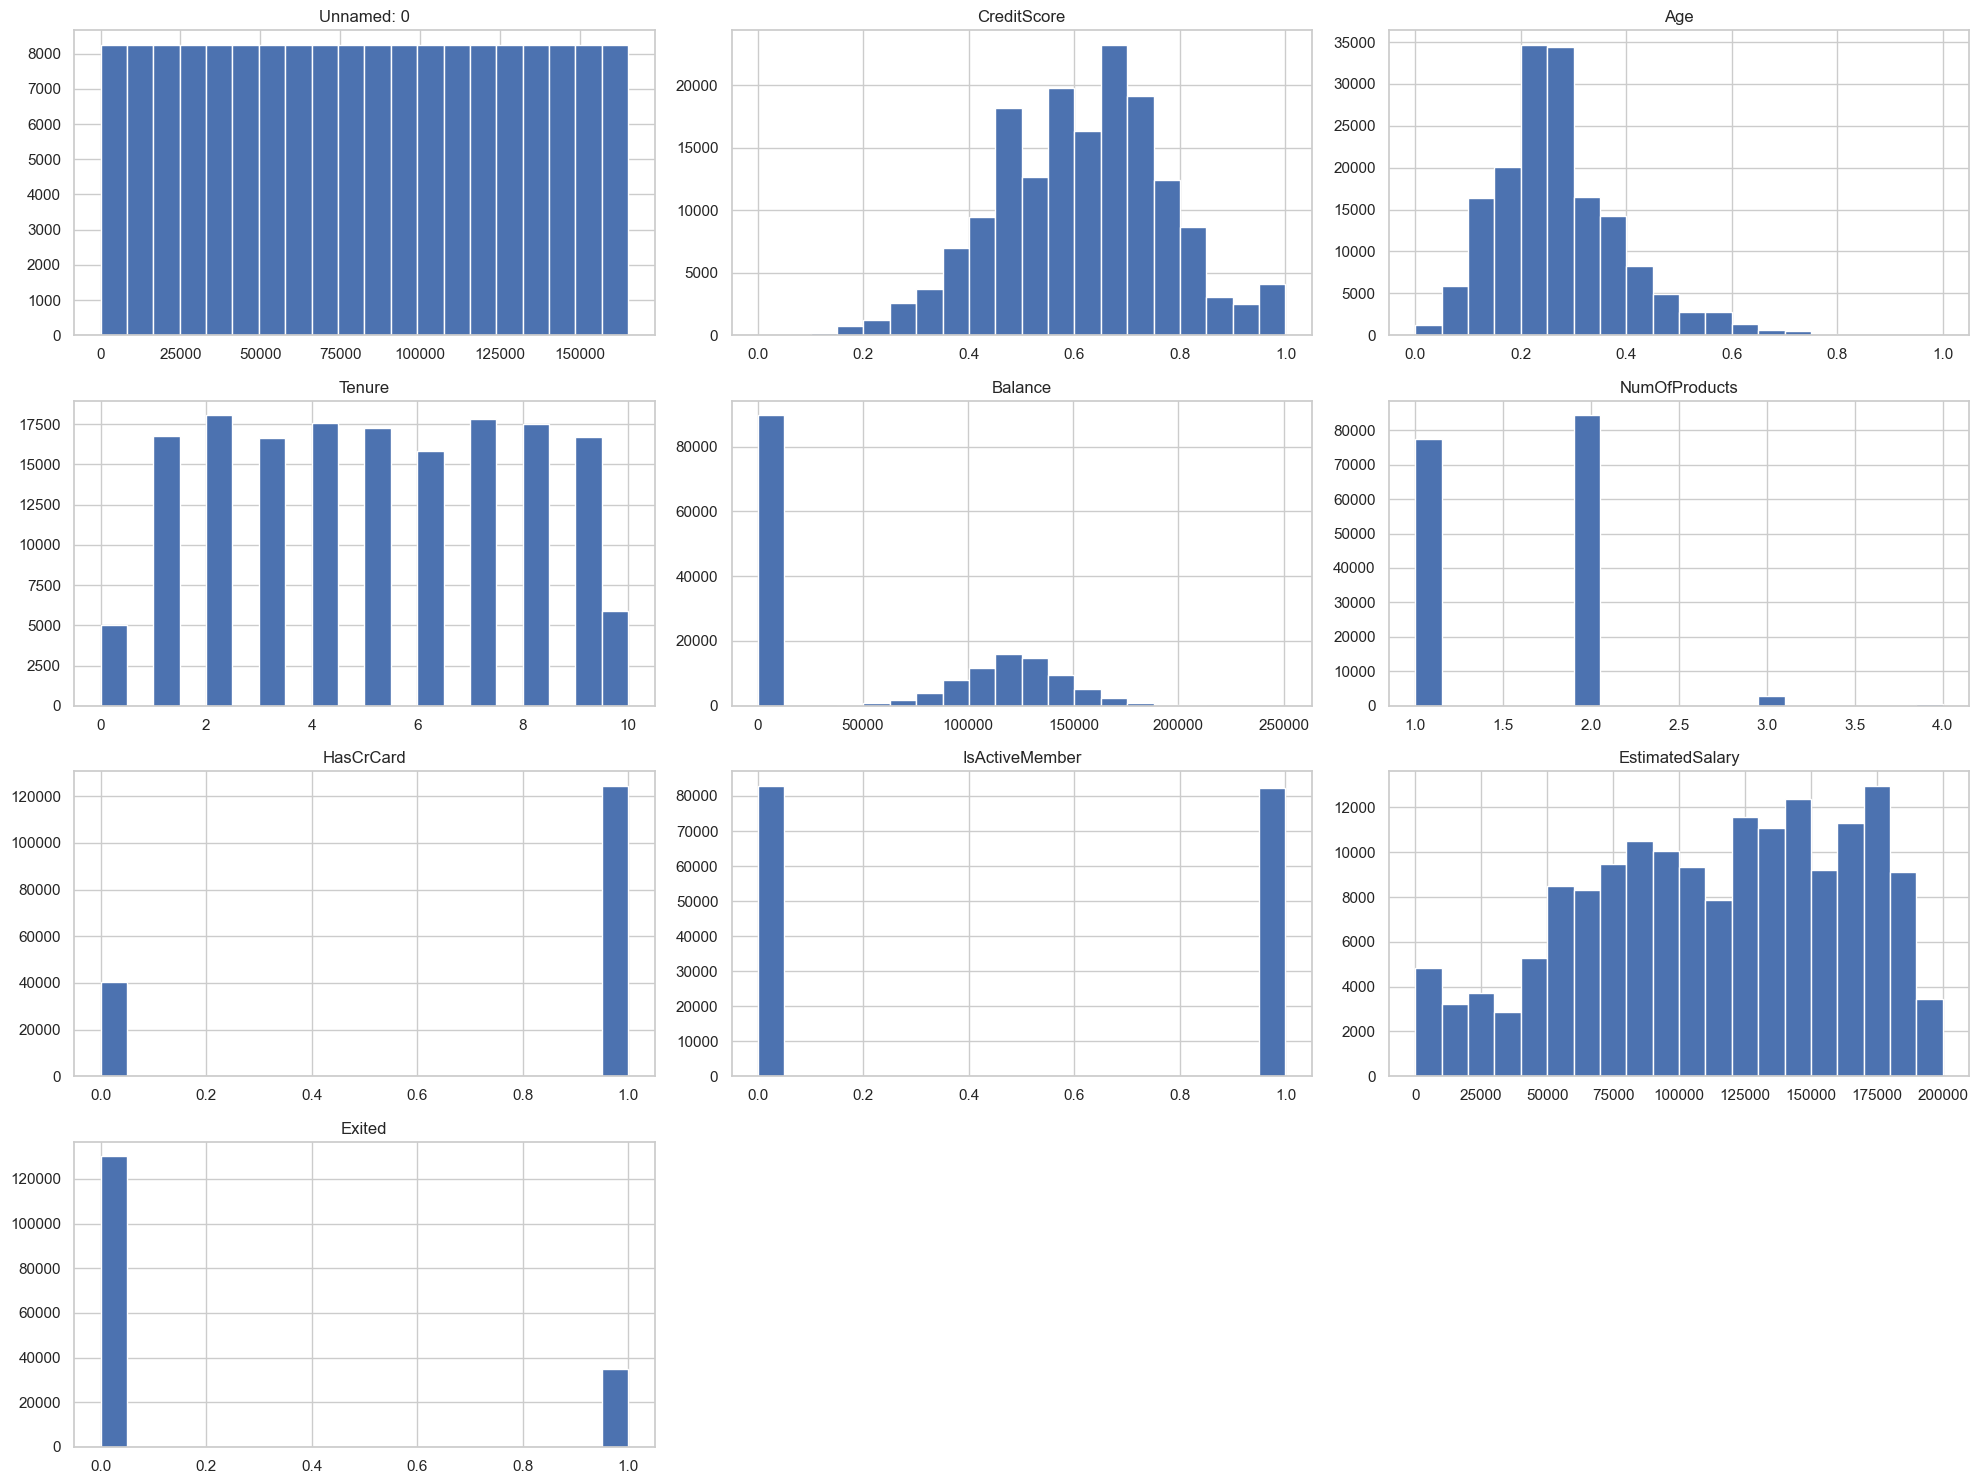

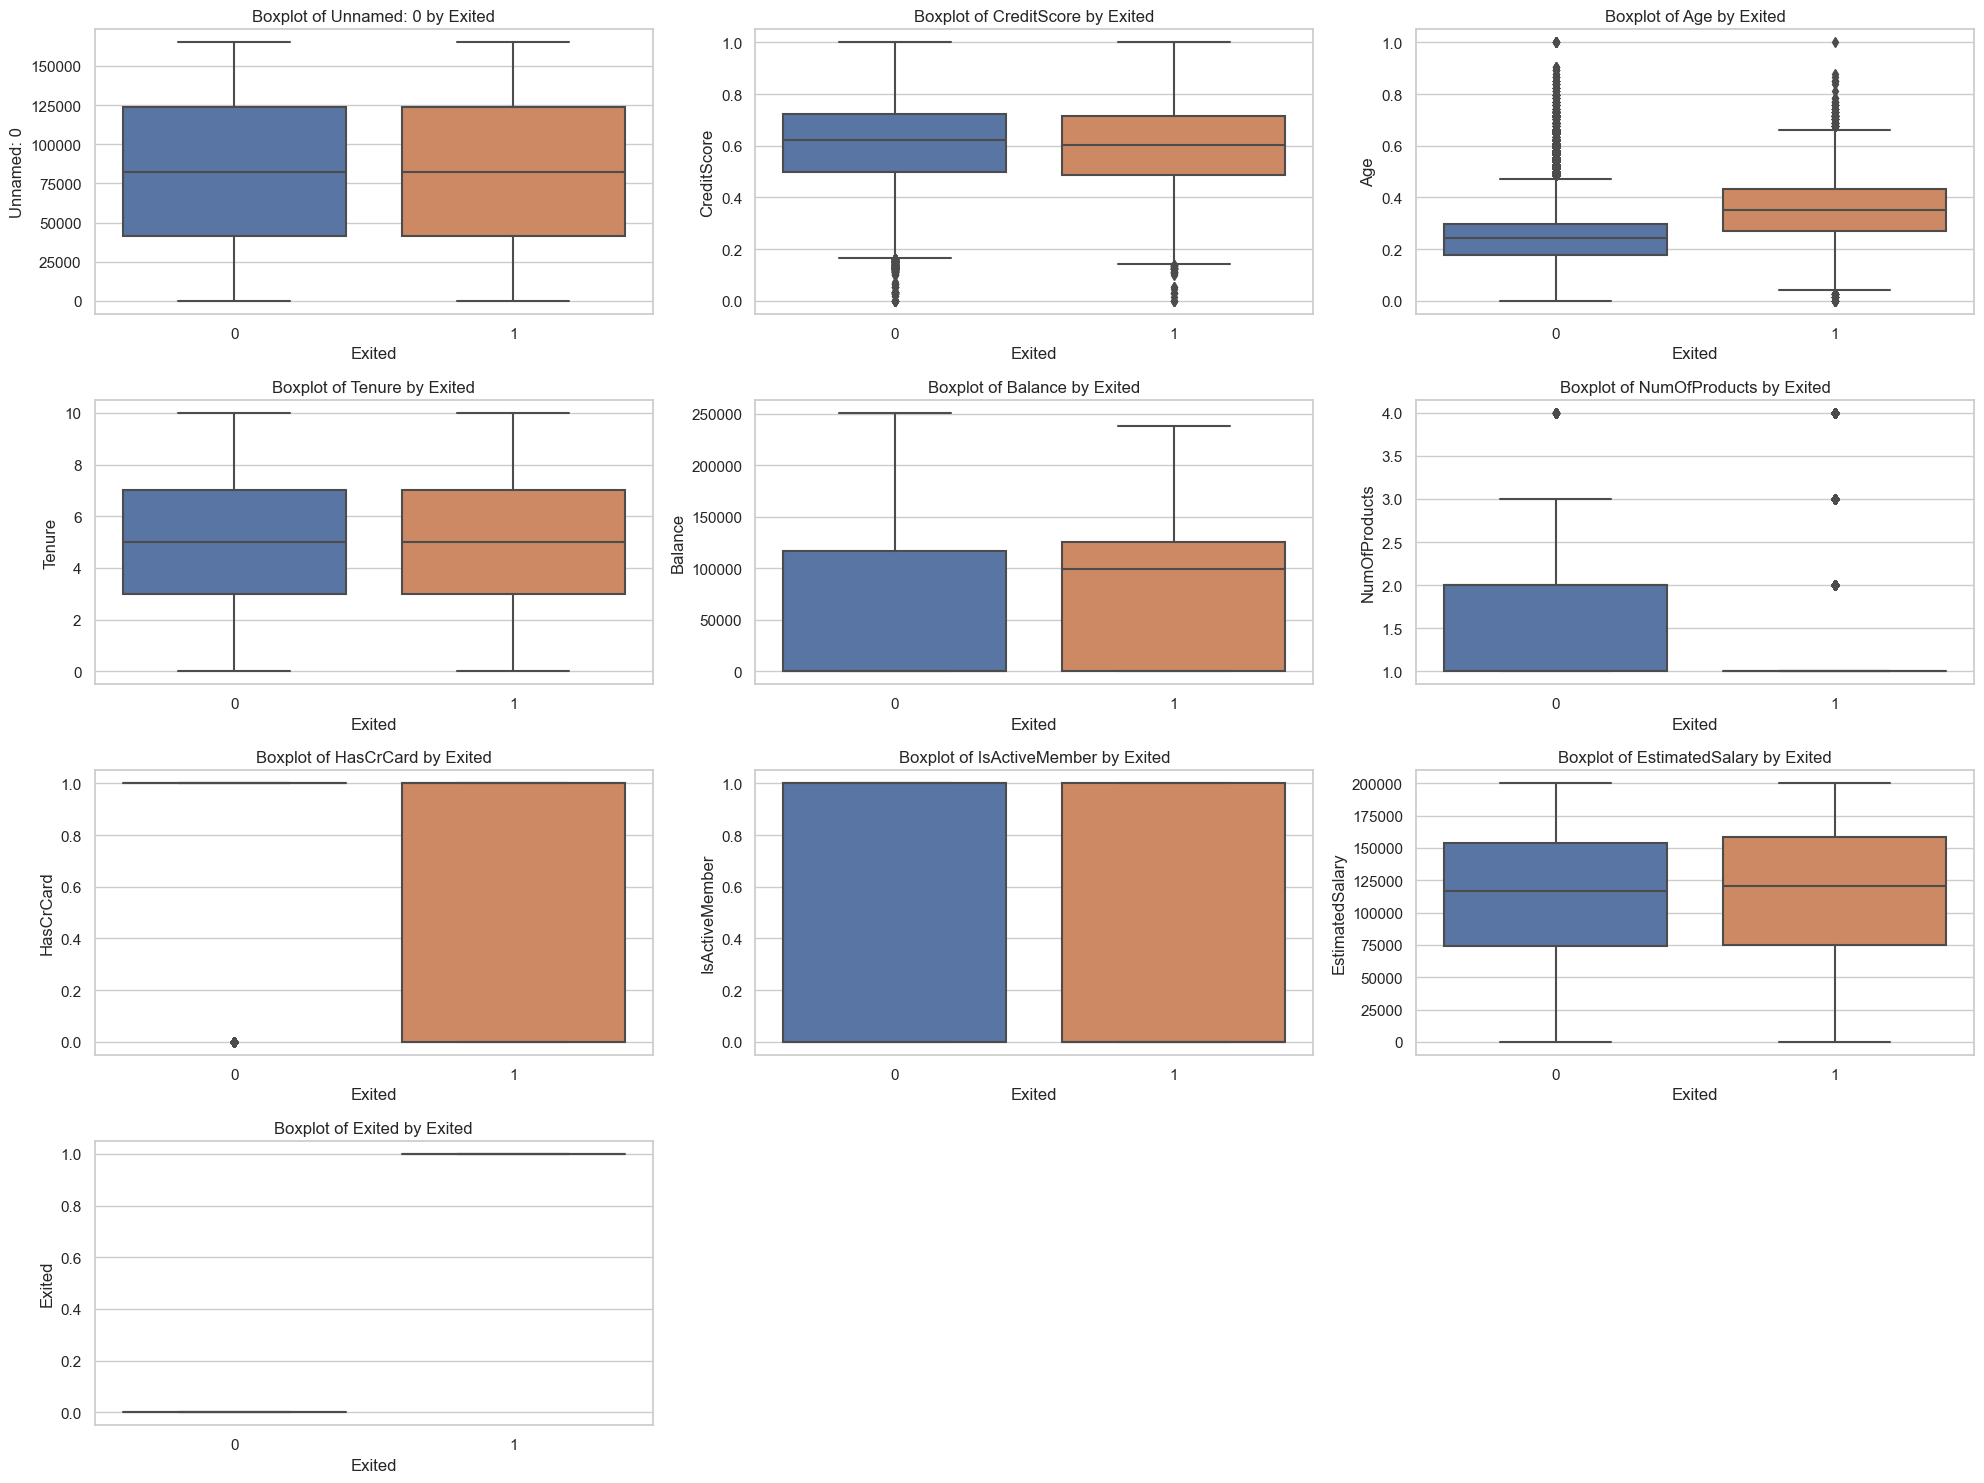

,Unnamed: 0,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,0.612909,0.271971,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,0.160207,0.119827,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,0.494000,0.189189,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,0.618000,0.256757,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,0.720000,0.324324,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.000000,1.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [14]:
# First, we ensure that all features used are numeric
numeric_columns = bank_data.select_dtypes(include=[np.number]).columns.tolist()

# We will use a histogram to understand the distribution of the numeric features
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    bank_data[col].hist(bins=20)
    plt.title(col)

plt.tight_layout()
plt.show()

# Additionally, we will create boxplots for these numeric features to identify any potential outliers or significant variations
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='Exited', y=col, data=bank_data)
    plt.title(f"Boxplot of {col} by Exited")

plt.tight_layout()
plt.show()

# Display summary statistics for the numeric features only
summary_numeric = bank_data[numeric_columns].describe()

summary_numeric


C:\Users\tsher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tsher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\tsher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tsher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

(        Unnamed: 0    CreditScore            Age         Tenure  \
 count  165034.0000  165034.000000  165034.000000  165034.000000   
 mean    82516.5000       0.612909       0.271971       5.020353   
 std     47641.3565       0.160207       0.119827       2.806159   
 min         0.0000       0.000000       0.000000       0.000000   
 25%     41258.2500       0.494000       0.189189       3.000000   
 50%     82516.5000       0.618000       0.256757       5.000000   
 75%    123774.7500       0.720000       0.324324       7.000000   
 max    165033.0000       1.000000       1.000000      10.000000   
 
              Balance  NumOfProducts      HasCrCard  IsActiveMember  \
 count  165034.000000  165034.000000  165034.000000   165034.000000   
 mean    55478.086689       1.554455       0.753954        0.497770   
 std     62817.663278       0.547154       0.430707        0.499997   
 min         0.000000       1.000000       0.000000        0.000000   
 25%         0.000000       1.0

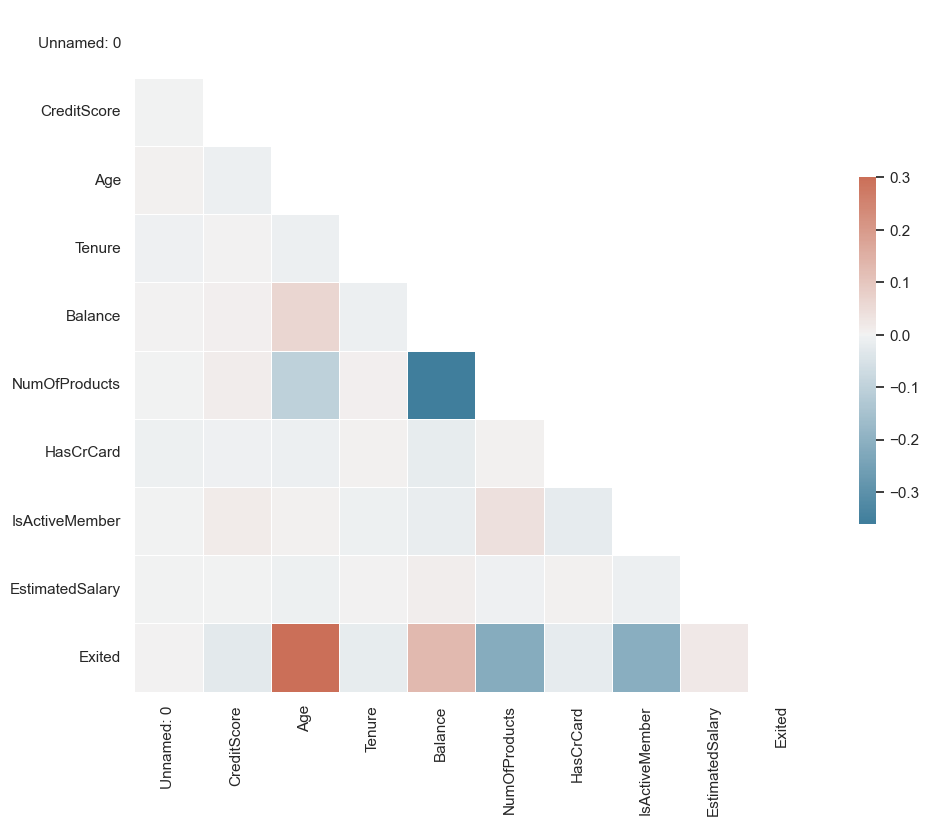

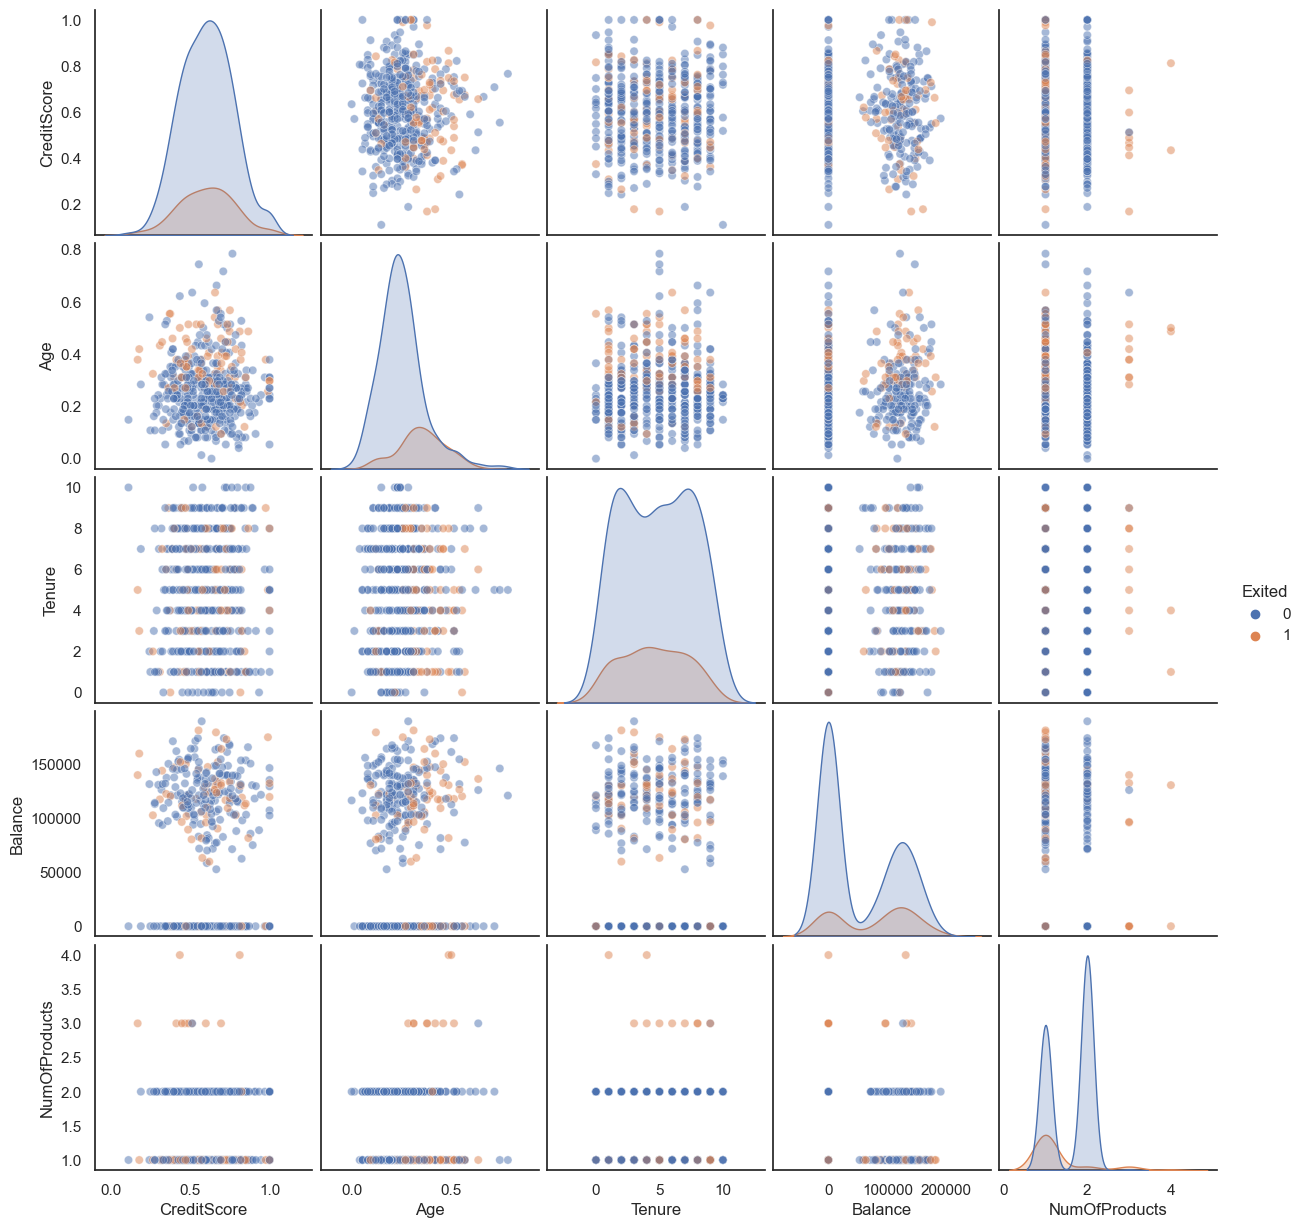

In [15]:
# Let's attempt to identify patterns in the dataset as part of Exploratory Data Analysis (EDA)

# Summary statistics to identify any obvious patterns or anomalies
summary_statistics = bank_data.describe()

# Correlation matrix to identify any linear relationships between features
correlation_matrix = bank_data.corr(numeric_only=True)

# Now let's look for patterns by visualizing the data
# For visualization, we can use plots to understand the distribution and relationships between features

# We will use seaborn to create a heatmap for the correlation matrix to identify strongly correlated variables
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Let's also create a pair plot for a subset of features
# We will select a mix of numerical and categorical features for diversity
# Let's use 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', and 'Exited' as the target variable
subset_for_pairplot = bank_data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'Exited']]
# Convert 'Age' back to original scale if it was normalized
if subset_for_pairplot['Age'].max() <= 1:
    age_max = bank_data['Age'].max()
    age_min = bank_data['Age'].min()
    subset_for_pairplot['Age'] = subset_for_pairplot['Age'] * (age_max - age_min) + age_min

# Drop any missing values for visualization purposes
subset_for_pairplot = subset_for_pairplot.dropna().copy()

# Since the dataset might be large, let's use a sample for the pairplot to save on resources
sample_for_pairplot = subset_for_pairplot.sample(n=min(500, len(subset_for_pairplot)), random_state=1)
pairplot_figure = sns.pairplot(sample_for_pairplot, hue='Exited', plot_kws={'alpha': 0.5})

summary_statistics, heatmap, pairplot_figure


In [16]:
so age number of products and balance seem to be correlated and maybe credit score

SyntaxError: invalid syntax (2346676376.py, line 1)

In [ ]:
# To provide a better visualization, we can consider creating separate plots for each 'NumOfProducts' category
# and use boxplots to better understand the distribution of 'Age' across different 'NumOfProducts'

plt.figure(figsize=(14, 7))
sns.boxplot(x='NumOfProducts', y='Age', hue='Exited', data=bank_data)
plt.title('Age Distribution by Number of Products and Churn Status')
plt.xlabel('Number of Products')
plt.ylabel('Age')
plt.legend(title='Exited', loc='upper right')
plt.grid(True)
plt.show()

## Key Observations:

### Age by Number of Products:
- The distribution of ages across different numbers of products shows that younger customers tend to have fewer products. The age range broadens as the number of products increases.

### Balance by Number of Products:
- Customers with a higher balance tend to have fewer products. There's a notable decrease in median balance as the number of products increases, especially for customers with 3 or 4 products.

### Age and Churn Status by Number of Products:
- The split violin plot for age and churn status across different numbers of products illustrates that churned customers have a wider age distribution for 1 or 2 products, indicating that age could be a factor in churn for customers with fewer products.

### Credit Score and Churn Status by Number of Products:
- The distribution of credit scores doesn't show a stark difference between churned and retained customers across the number of products. This suggests that while credit score might play a role, it does not exhibit as clear a pattern in relation to churn and the number of products as age and balance do.


C:\Users\tsher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tsher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


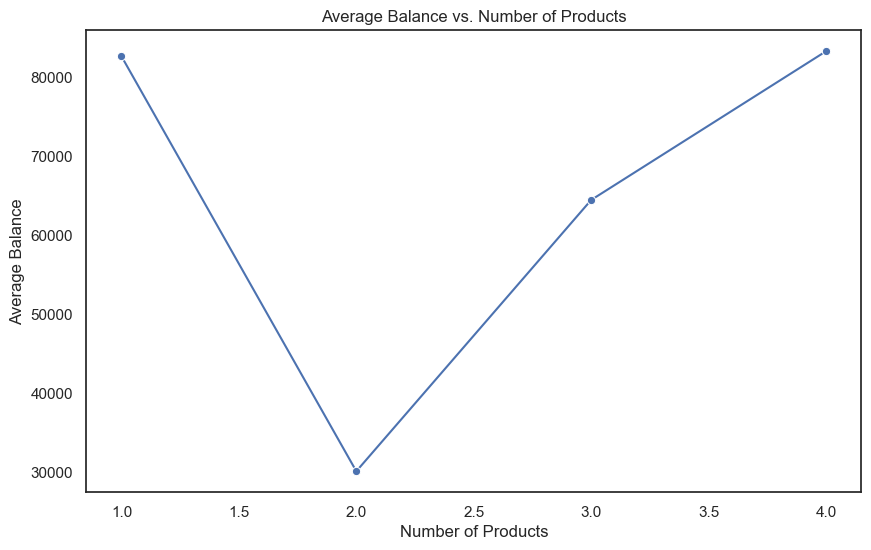

In [24]:
# Calculate the average balance for each number of products
avg_balance_per_product = bank_data.groupby('NumOfProducts')['Balance'].mean().reset_index()

# Create a line plot of the average balance vs. number of products
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_balance_per_product, x='NumOfProducts', y='Balance', marker='o')
plt.title('Average Balance vs. Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Average Balance')

# Show the plot
plt.show()

## Strategy for Reducing Churn

Enhancing product cross-selling efforts could potentially reduce overall churn. Introducing targeted offers for customers to adopt additional products or services could address this issue.


In [ ]:
# For continuous variables
sns.histplot(bank_data['CreditScore'], kde=True)

In [25]:
bank_data.columns

Index(['Unnamed: 0', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of Customer Exit Status (Pie Chart)')

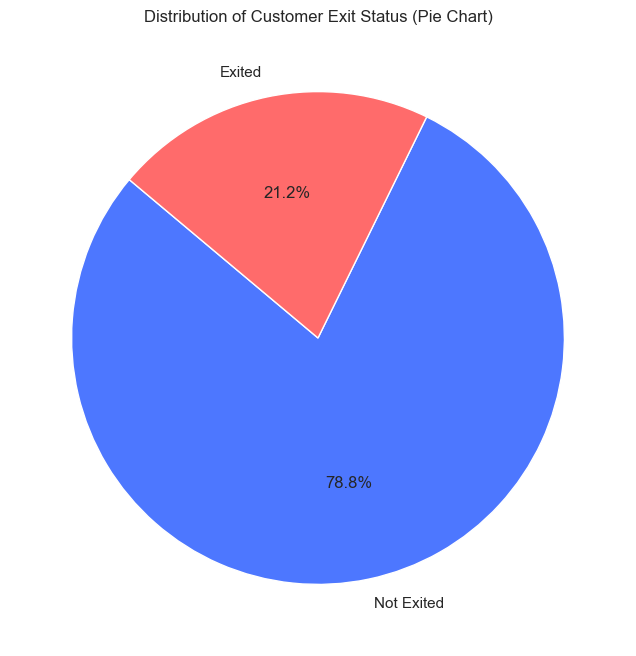

In [32]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 8))

# Pie chart for the distribution of the 'Exited' feature
plt.subplot(1, 2, 1)
exited_counts = bank_data['Exited'].value_counts()
exited_labels = ['Not Exited', 'Exited']
plt.pie(exited_counts, labels=exited_labels, autopct='%1.1f%%', startangle=140, colors=['#4D77FF', '#FF6B6B'])
plt.title('Distribution of Customer Exit Status (Pie Chart)')


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

# Isolating continuous variables
continuous_vars = bank_data[['Age', 'Balance']]

# Standardizing the variables
scaler = StandardScaler()
continuous_vars_scaled = scaler.fit_transform(continuous_vars)

# Display the first few rows of the standardized data
pd.DataFrame(continuous_vars_scaled, columns=continuous_vars.columns).head()


,Age,Balance
0,-0.578074,-0.883163
1,-0.578074,-0.883163
2,0.211354,-0.883163
3,-0.465298,1.486918
4,-0.578074,-0.883163


Above Average Balance: The positive value indicates a customer with a higher than average balance, potentially signaling a more profitable or engaged customer. These customers might be less likely to churn due to more established relationships with the bank, higher satisfaction, or the complexity of moving higher balances and associated services to another institution.